In [1]:
from main_sbm import SBM

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def generate_graph_bicluster(Sr, Sc, thetas, random_seed = None):
    # Kr = thetas.shape[0]
    # Kc = thetas.shape[1]

    N = np.sum(Sr)

    Hr = []
    c = 0
    for i in Sr:
        for j in range(i):
            Hr += [c]
        c+=1

    Hc = []
    c = 0
    for i in Sc:
        for j in range(i):
            Hc += [c]
        c+=1

    if isinstance(random_seed, int):
        np.random.seed(random_seed)

    X = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i == j:
                continue
            X[i, j] = np.random.binomial(1, thetas[Hr[i], Hc[j]])

    return X

In [4]:
theta = np.array([[0.75, 0.25, 0.25, 0.25],
                  [0.25, 0.75, 0.25, 0.25],
                  [0.25, 0.25, 0.75, 0.25],
                  [0.25, 0.25, 0.25, 0.75]])

Sr = [15, 15, 15, 15]
Sc = [15, 15, 15, 15]

Hr = []
c = 0
for i in Sr:
    for j in range(i):
        Hr += [c]
    c+=1

Hc = []
c = 0
for i in Sc:
    for j in range(i):
        Hc += [c]
    c+=1

z0 = [np.array(Hr), np.array(Hc)]

X = generate_graph_bicluster(Sr, Sc, theta, random_seed=42)

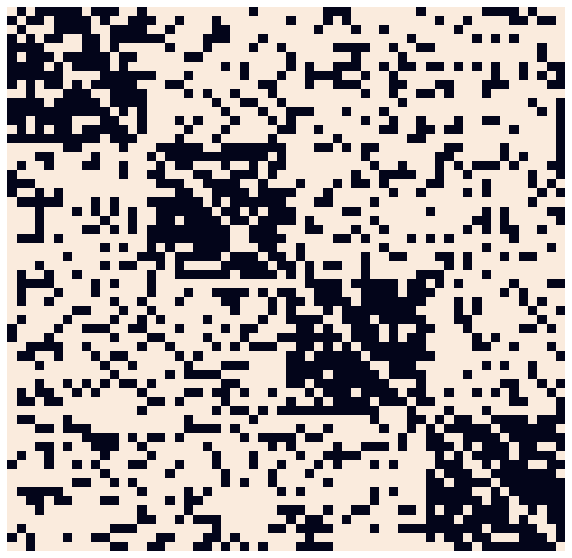

In [17]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(X, linewidth=0.0, ax = ax, cbar=False, cmap= 'rocket_r', xticklabels=[], yticklabels=[])
# ax.set_yticks([i*10 for i in range(10)])
# ax.set(xticks=[i*10 for i in range(10)])
# ax.set_xlim([i*10 for i in range(10)])
# ax.set_ylim([i*10 for i in range(10)])
plt.show()

In [11]:
config = {'directed': True,
          'binary': True,
          'unicluster': True}

In [38]:
DP = SBM(config, alpha_PY_r = 10, set_seed=42)

In [39]:
DP.fit(X,5000)

In [40]:
DP.Z[-1]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],


In [15]:
X

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [29]:
nn = list(DP.idx_list)
nn.remove(0)

In [30]:
nn

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]